# [Kaggle: Breast cancer analysis and prediction](https://www.kaggle.com/code/vincentlugat/breast-cancer-analysis-and-prediction/data)

<div dir="rtl">

# 1. הקדמה והצגת הבעיה

פרויקט זה כולל שימוש בdataset הנקרא "Breast Cancer Wiseconsin (Diagnostic) Dataset" המכיל 30 פיצ'רים ו-569 תצפיות המבוססים על תמונות שהופקו על ידי בדיקה הנקראת Fine Needle Aspiration. בדיקה זו מאפשרת לנו לחלץ את תכונות גרעין התא המופיע בתמונה.
אותם 30 הפיצ'רים מורכבים מ10 תכונות המהוות את הפיצ'רים הבסיסיים. אותה הרכבה מבוססת על פעולות של ממוצע, סטיית תקן והמצב הרע ביותר עבור כל תכונה. המשמעות במצב הרע ביותר היא הערך הספרתי עבור כל פיצ'ר המצביע על גידול סרטני פוטנציאלי.
Dataset זה מגיע יחד עם labels המצביעים על האם קיים גידול בתמונה, כאשר M מעיד על גידול בעוד B לא ולכן נממש מודל של supervised training.
מטרת הפרויקט הינה סיווג של האם קיים גידול סרטני או לא בהתבסס על סט הפיצ'רים הנתון תוך כדי שמירה על רמת דיוק גבוהה באמצעות המודל הנבחר.


</div>

<div dir="rtl">

# 2. ייבוא ספריות וקריאת הנתונים


> # 2.1. ייבוא הספריות
כבכל פרויקט יהיה עלינו לטעון את הספריות השימושיות.
לחישובים נומריים ואלגברה לינארית נטען את numpy.
את pandas נטען בכדי לעבוד עם dataframes וביצוע ניתוח נתונים מתקדם.
נעשה שימוש בספריית sklearn עבור שימוש ברגרסיה לוגיסטית ובעוד כלים בשביל fitting וטיוב המודל. 
נטען ספריות גרפיות כמו matplotlib ו-seaborn בכדי להציג גרפים שיעזרו לנו משלב הבנת הבעיה, הנדסת הפיצ'רים והEDA עד לשלב בניית המודל.





</div>

In [1]:
# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# tells matplotlib to embed plots within the notebook
%matplotlib inline

import pandas as pd  
import seaborn as sns 

<div dir="rtl">

> # 2.2. קריאת הנתונים
בכדי לקרוא את הנתונים נשתמש בספריית pandas ובפונקציית read_csv (מפני שזה הפורמט של הנתונים שלנו).
נפנה את פונקציית הקריאה אל הdataset שלנו באמצעות כתיבת URL המפנה לGitHub.
האמצעות פעולות אלו אנו יוצרים DataFrame (נקרא לו df) ובכך נוכל להמשיך ולממש עליו את הפעולות הבאות.
לבסוף נציג 10 תצפיות ראנדומליות מהdf וזאת בכדי להבין את התמונה הכוללת של הdataset.





</div>

In [2]:
url = 'https://raw.githubusercontent.com/avihaibd/ds-python-ml-project/main/data.csv'
df = pd.read_csv(url)
df.sample(10) # show a random 10 rows of the data 


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
36,854268,M,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.055980,...,30.36,116.20,799.6,0.14460,0.42380,0.51860,0.14470,0.3591,0.10140,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,...,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039,NaN
473,9113846,B,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.000000,...,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743,NaN
313,893988,B,11.54,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,...,12.87,81.23,467.8,0.10920,0.16260,0.08324,0.04715,0.3390,0.07434,NaN
555,924934,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.027380,...,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283,NaN
328,8953902,M,16.27,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.084880,...,30.38,129.80,1121.0,0.15900,0.29470,0.35970,0.15830,0.3103,0.08200,NaN
118,864877,M,15.78,22.91,105.70,782.6,0.11550,0.17520,0.21330,0.094790,...,30.50,130.30,1272.0,0.18550,0.49250,0.73560,0.20340,0.3274,0.12520,NaN
14,84667401,M,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.080250,...,32.01,108.80,697.7,0.16510,0.77250,0.69430,0.22080,0.3596,0.14310,NaN
519,917080,B,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.029950,...,21.74,93.63,624.1,0.14750,0.19790,0.14230,0.08045,0.3071,0.08557,NaN
342,89827,B,11.06,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.033410,...,19.90,79.76,440.0,0.14180,0.22100,0.22990,0.10750,0.3301,0.09080,NaN


<div dir="rtl">

> # 2.3. השגת אינפורמציה על הdf
כעת נעשה שימוש במתודת הinfo שתפקידה לספק לנו מידע חיוני על כל פיצ'ר המוצג בdf. מידע חיוני זה כולל את מספר התצפיות, העמודות (פיצ'רים יחד עם ID והlabels), הdata type של כל פיצ'ר ואת מספר הערכים התקינים שאינם Nulls עבור כל פיצ'ר.
פה ניתן להסיק כי הפיצ'ר בשם "unnamed 32" אינו מכיל ערכים שאינם Nulls ולכן אנו חושדים כי אפשר להשמיטו מן הdf.





</div>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<div dir="rtl">

> ממצאים:
1. מערך הנתונים שלנו מכיל 569 תצפיות ו-30 פיצ'רים (לא כולל העמודה unnamed: 32 שהינה טעות שנמצאת בdataset). בנוסף קיימות עוד שתי עמודות שאחת מהן היא הID והשנייה נקראת "Diagnosis" והיא המשתנה המוסבר שלנו.
2. כל הפיצ'רים מכילים ערכים מסוג float בעוד המשתנה המוסבר שלנו הינו 





</div>

<div dir="rtl">

> # 2.4. חישוב ערכים חסרים
דרך נוספת להבין את מספר הערכים החסרים בכל פיצ'ר הינה שימוש במתודת "isnull" שתמצא עבור כל ערך בכל פיצ'ר האם הוא Null או לא, ולבסוף תסכום את כלל הNulls בכדי שנבין את כמות הערכים החסרים בכל פיצ'ר. גם כאן לא נופתע לגלות כי הפיצ'ר "Unnamed 32" מכיל **רק** ערכים חסרים. לאחר בדיקה בקובץ הCSV, ניתן להבחין כי לאחר העמודה ה31 מופיע פסיק, ובעקבות פסיק זה נוצרת לנו עמודה מספר 32 שהיא גם unnamed כי לא הוקצה שם לאחר אותו פסיק.
 אנו מבינים כי אפילו לא מדובר בפיצ'ר אלא בשגיאה בקובץ הנתונים ולכן נשמיט את אותה עמודה מהdf. 



</div>

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<div dir="rtl">


> # 2.5. השמטת עמודות לא רלוונטיות


> בשלב זה נרצה לנקות את הdf שלנו על פי המסקנות מהסעיפים הקודמים, כלומר, להשמיט את עמודת unnamed שנוצרה לנו עקב טעות בקובץ ה CSV ובנוסף נשמיט את עמודת ה"ID" שגם לא רלוונטית לאימון המכונה. השמטה זו נבצע באמצעות מתודת "drop" של ספריית ה"pandas":

</div>

In [5]:
df = df.drop(['Unnamed: 32','id'],axis = 1)

<div dir="rtl">

# 3. EDA - חקירה ואנליזה של הנתונים
> # 3.1. המשתנה המוסבר
המשתנה המוסבר שלנו (נקרא גם משתנה מטרה) הוא הdiagnosis.
משתנה זה מהווה את מצב הפציינט. האם הוא בעל גידול ממאיר (Maligent) או לא ממאיר (Benign). 
בכדי לקבל פירוט על משתנה המטרה שלנו נקרא למתודה "value_counts" שתציג לנו את הערכים האפשריים של המשתנה יחד עם כמות הפעמים שכל ערך מופיע.
להלן המשתנה המוסבר:

</div>

In [6]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64



<div dir="rtl">

>יש לנו סה"כ 569 מטופלים שנמצאים במחקר, בניהם 212 כאלה שנמצא אצליהם גידול ממאיר, ו 357 שהגידול שלהם לא היה ממאיר (37%). אחוז זה יחסית בסדר. במידה ואחוז התצפיות של הגידולים הממאירים היה נמוך, היה עלינו להתחשב בכך וליישם מטריקת מדידה נכונה למקרה זה (הרי שימוש בaccuracy יניב לנו תוצאות מטעות) אבל בכל אופן הdataet שלנו מאוזן מה שמאפשר שימוש במדד הaccuracy.

> מהתוצאות שהתקבלו מעלה אנו מבינים כי משתנה המטרה שלנו הינו קטגוריאלי. יש לקחת בחשבון שתחום למידת המכונה עושה שימוש בערכים מספריים ולא במחרוזות ויהיה עלינו להמיר את המשתנה המוסבר אל ערכים מספריים בהמשך. נבצע את ההמרה בחלק הנדסת הפיצ'רים.

</div>



---



---



<div dir="rtl">

> נציג את ההיסטוגרמה של המשתנה המוסבר:

</div>




<AxesSubplot:xlabel='diagnosis', ylabel='count'>

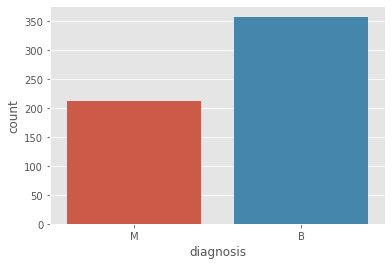

In [7]:
sns.countplot(x = "diagnosis", data = df)

<div dir="rtl">

> # 3.2. בדיקת נתונים סטטיסטיים של הפיצ'רים
הניתוח שביצענו עד כה מביא לנו את התמונה הגדולה, כעת נרצה לצלול טיפה יותר לעומק ולבדוק את הנתונים הסטטיסטיים של הפיצ'רים.

> נשתמש במתודה "describe" ונקבל:



</div>



In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<div dir="rtl">

> ברשותינו טבלה שמאפשרת לנו להבין את כמות הנתונים בכל פיצ'ר, מדדים סטטיסטיים הכוללים את הממוצע, סטיית התקן, אחוזונים וערכי המקסימום.


> ניתן לראות כי לעיתים רחוקות ערך המקסימום נראה כמאוד גבוה מהערך הממוצע (לדוגמה בפיצ'ר בשם area_mean) אך איננו רוצים לתת לזה להיות כלל האצבע שלנו בהשמטת פיצ'רים מכיוון שהdataset שלנו לא גדול במיוחד ובמקרה של סיווג בין גידול ממאיר ללא ממאיר קיימת משמעות חשובה לערכי קיצון, אשר יכולים להוות את הגבול בין החלטה כזו לאחרת. אז כעת נמתין עם השמטת הפיצ'רים ונבצע אותה בהמשך לאחר בדיקות נוספות.

</div>



<div dir="rtl">

# 3.3. הפיצ'רים



> כמו שהוסבר בהתחלה, בdataset יש לנו 30 פיצ'רים (ללא ההתייחסות למשתנה המטרה ול-ID).
את הפיצ'רים השיגו מניתוח מספר תמונות שנסרקו מהמטופל כך שכל תצפית כוללת פיצ'רים שהוצאו ממספר תמונות. 30 הפיצ'רים מבוססים על 10 פיצ'רים בסיסיים שבכל קבוצה מקבלים משמעות מעט שונה. בקוד מטה ניתן לראות את אותם פיצ'רים בסיסיים ואת השוני ביניהם בכל קבוצה. קבוצת הפיצ'רים הראשונה הינה הממוצעים, השניה היא סטיות השגיאה והשלישית הינה התוצאות הרעות ביותר (שמקרבות את הפציינט להחלטה של גידול ממאיר).


> עכשיו אנחנו נגשים לטפל במשתנים המסבירים. נציג רק את שמות הפיצ'רים באמצעות המתודה "columns":

</div>





In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<div dir="rtl">

> נסווג לשלושת הקבוצות המתוארות מעלה.
</div>





<div dir="rtl">

> קבוצה אחת של כל הממוצעים שנאספו מהתצלומים של המטופלים  (נתחיל מעמודה 1 בכדי לא להכליל את הID והמשתנה מטרה):
</div>


In [10]:
df_mean=df.iloc[:,1:11]

<div dir="rtl">

> קבוצה נוספת של טעות התקן שלהם (סטיית התקן לחלק לשורש התצפיות של כל מטופל):
</div>



In [11]:
df_se = df.iloc[:,11:21]

<div dir="rtl">

> והקבוצה האחרונה היא בעצם הערך הגרוע (והמסוכן) ביותר של כל פיצ'ר עבור כל מטופל:
</div>



In [12]:
df_worst = df.iloc[:,21:]

<div dir="rtl">

# 3.4. התפלגות הממוצעים
> כעת נרצה להבין טוב יותר אילו פיצ'רים מפריעים לנו לקבלת המודל הטוב ביותר. נתחיל בהצגת ההיסטוגרמות של קבוצת הממוצעים. את ההיסטוגרמות נייצר באמצעות הפעלת מתודת ההיסטוגרמה "hist" על קבוצת הממוצעים "df_mean":
</div>



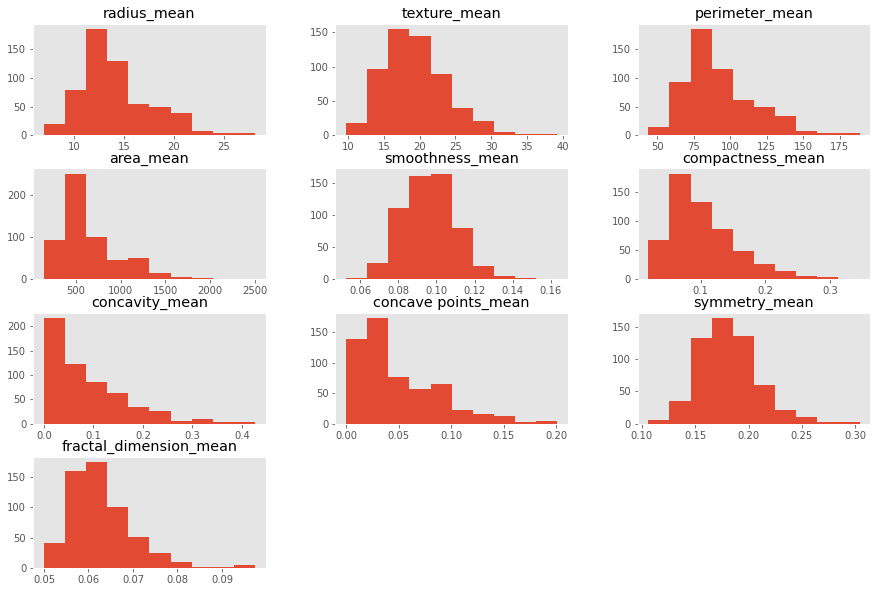

In [13]:
hist_mean = df_mean.hist(bins=10, figsize=(15, 10),grid=False)

<div dir="rtl">

> אנו למדים מהיסטוגרמות אלו את ההתפלגות של כל ממוצע. מה שעומד לנו בקנה אחד יחד עם הניתוח הסטטיסטי שביצענו קודם.
</div>



<div dir="rtl">

# 3.5. מולטי קורלציה של קבוצת הממוצעים
> דרך טובה מאוד להבין את ההשפעה של פיצ'ר אחד עם השני הוא לתאר את הקורלציה שלהם בצורה גרפית. באם נצפה בשני פיצ'רים שהקורלציה ביניהם גבוהה, נבין כי ההשפעה שלהם יותר תזיק מאשר תתרום למודל שלנו. אנו רוצים ללמד את המכונה את אותם הדפוסים המיוחדים של פיצ'רים שאינם משפיעים על הפיצ'רים האחרים. כך נוכל לבנות מודל חזק עם הפיצ'רים ההכרחיים שלא יטו את תוצאות אימון המכונה. בשביל לבחון זאת ניצור גרפים שיציגו את הקורלציה בין כלל הפיצ'רים בקבוצה יחד עם הground truth של כל תצפית ובכך נוכל להבחין בדפוס של פיצ'ר כתלות במשתנה המטרה יחד עם ההבנה של האם הפיצ'רים נמצאים בקורלציה גבוהה- הרי אם נבחין שהתצפיות של פיצ'ר אחד "עולות" על התוצאות של פיצ'ר אחר נדע כי יש ביניהם קורלציה. בשביל להציג את הגרפים נעשה שימוש במתודת "pairplot" של ספריית "seaborn".
</div>



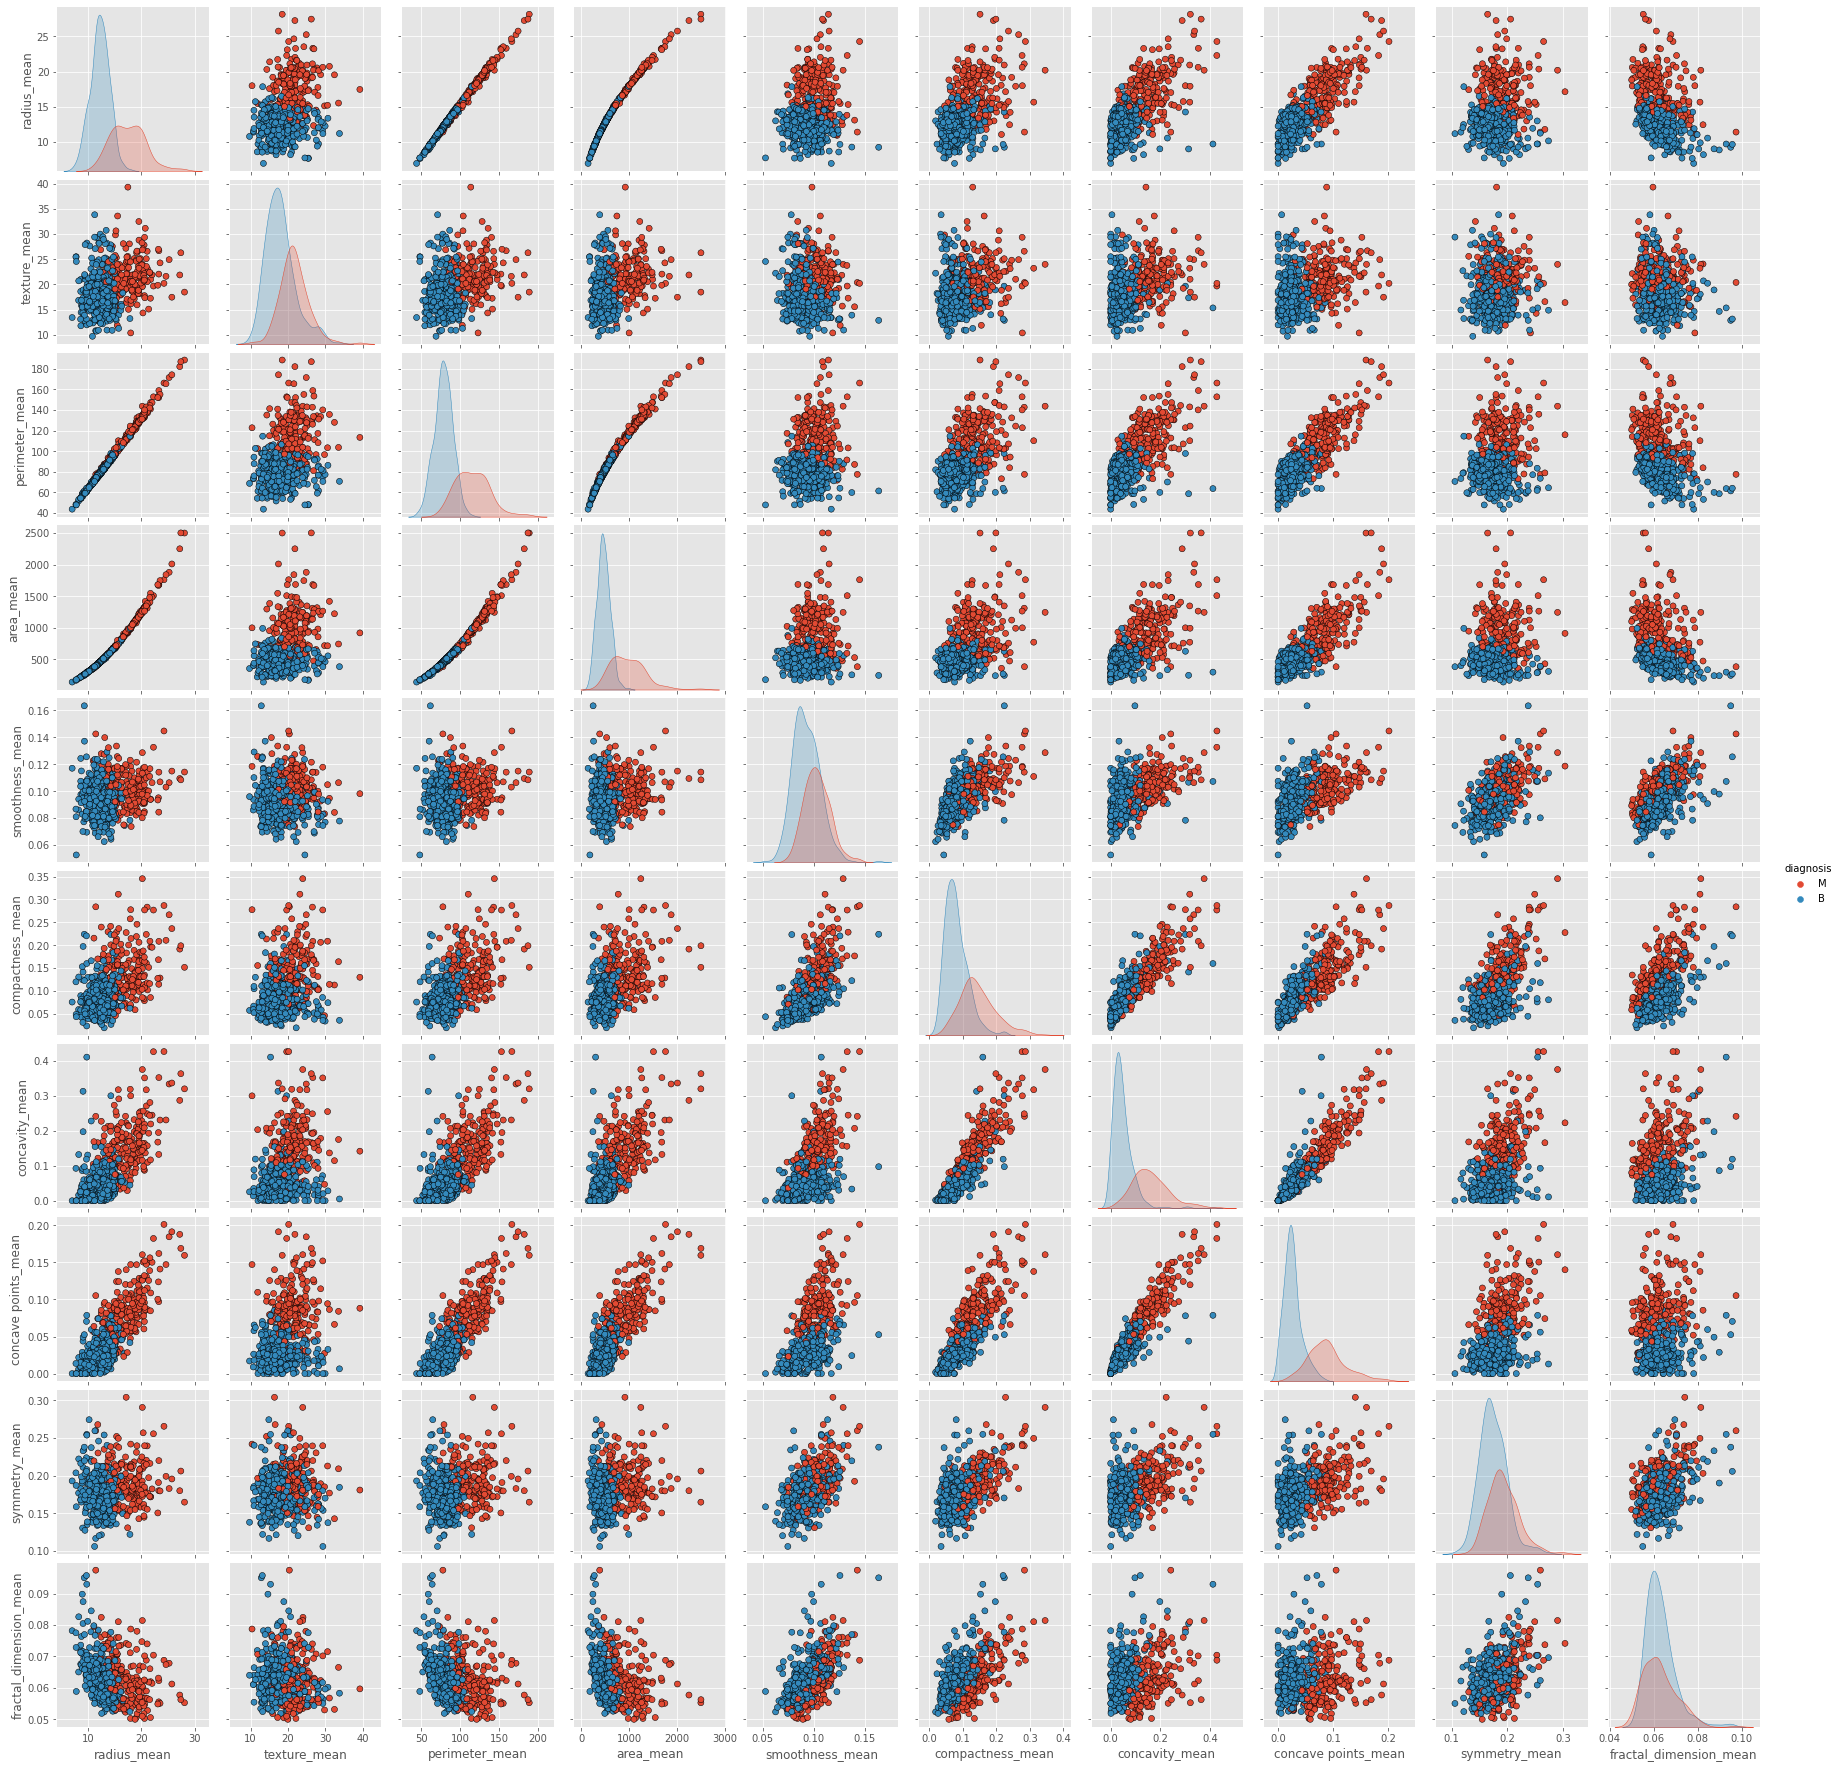

In [14]:
pp_mean = sns.pairplot(df[df.columns[0:11]], hue = "diagnosis", plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))

<div dir="rtl">

> מולטי קורולציה בין הממוצעים, כאשר אנחנו יכולים לראות באיזה איזורים בקורולציות השונות יש יותר חולים ואיפה יש מעט חולים.

> ניקח לדוגמה את radius_mean ואת perimeter_mean. ניתן לראות לפי הגרף שקיימת קורלציה ביניהם (תצפיות משנ הפיצ'רים עולות אחת על השניה). הדבר מסתדר גם עם ההיגיון- הרי יש קשר ישיר בין רדיוס אל היקף! אנו מניחים כי תמונת הגידול קרובה במובן מסויים אל צורת המעגל ולכן קיים הקשר P = 2 * pi * r. 

> מצד שני נסתכל על "smoothness_mean" ליד "perimeter_mean"- כאן ניתן לראות בבירור שקיים דפוס. מהערך ~95 של היקף נוכל לראות כי כלל התצפיות מסווגות כגידולים ממאירים. גרפים אלו עזרו לנו להבין מתי קיימת קורלציה ומהם הדפוסים, אך כעת נרצה להיעזר בערך מספרי בכדי להגדיר סף מסויים שאם אחוזי הקורלציה של הפיצ'ר עוברים אותו, נגדיר את אותו הפי'צר כ"highly correlated".

> ניצור דיאגרמת חום מספרית שתציג לנו את אחוזי הקורלציה בין פיצ'רים. נזכיר כי בין אם הערך מתקרב ל1 או 1- זה אומר שקיימת קורלציה גבוהה (חיובית או שלילית). נזכור גם כי האלכסון מציג את הקורלציה של הפיצ'ר עם עצמו ובגלל זה נבחין בקורלציה גבוהה במיקומים אלו.

</div>

<AxesSubplot:title={'center':'Breast Cancer Feature Correlation'}>

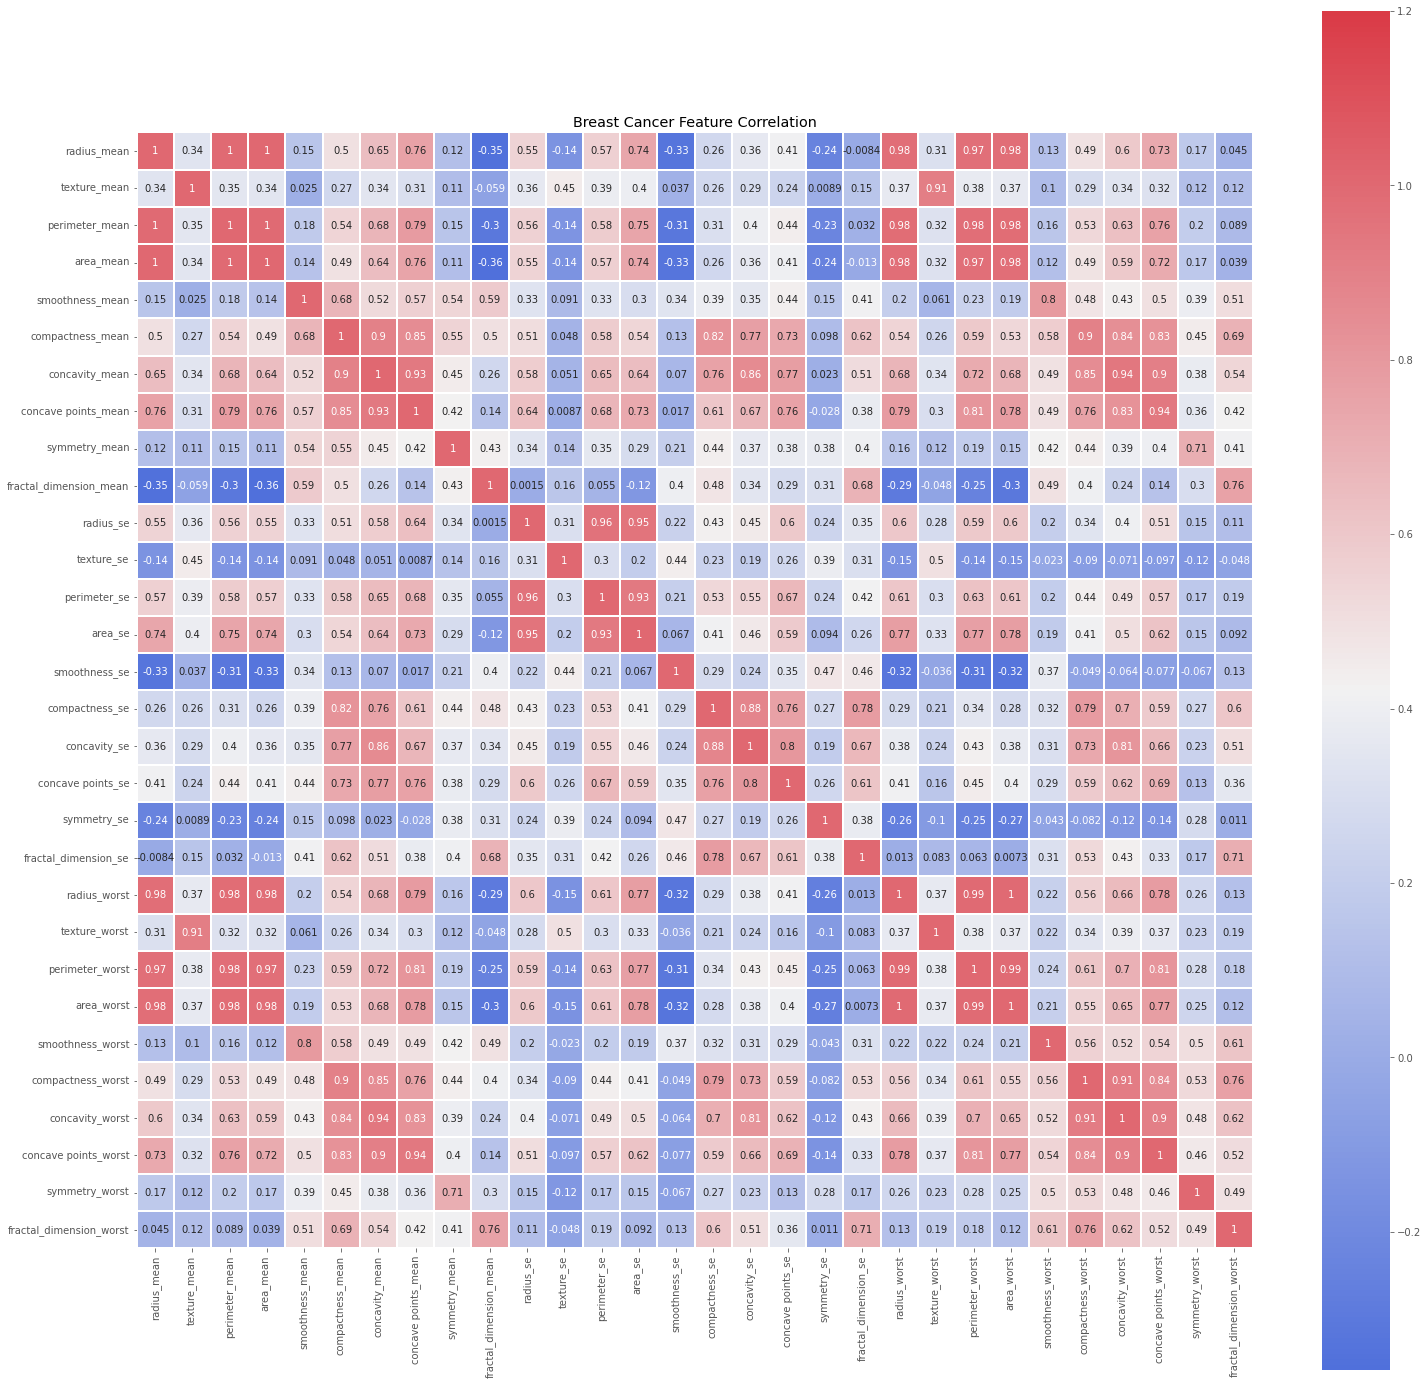

In [15]:
plt.figure(figsize=(25, 25))
plt.title('Breast Cancer Feature Correlation')
cmap = sns.diverging_palette(260, 10, as_cmap=True)
sns.heatmap(df.corr("spearman"), vmax=1.2, annot=True, square='square', cmap=cmap, linewidths=2)



<div dir="rtl">

> מולטי קורולציה בין המסבירים השונים - כאשר החלק החשוב כאן שישנה קורולציה כמעט מוחלטת בין הרדיוס ההיקף והשטח של הגידול , בנוסף יש קורולציה גבוהה בין העקימות לבין הקעירות של הצורה, ולכן נשתמש רק באחד מהמסבירים האלה, כדי להוריד דרגות חופש מהמודל.

</div>


<div dir="rtl">

> ניצור פונקציה שמקבלת את הקורוצליות בין המסבירים לפי ספירמן + נקודת סף שבמידה ומסביר עובר אותה הוא יירשם ב"col_corr" בכדי שבעצם ניצור רשימה של פיצ'רים שמוגדרים כ"Highly Correlated".


</div>

In [16]:
# With the following function we can select highly correlated features
# It will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr("spearman")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


<div dir="rtl">



> נקבע את סף ההחלטה ל75% ונפעיל את הפונקציה שבנינו על כל שלושת הקבוצות. נשמור את תוצאות הסינון במשתנים מטה. נפעיל את פונקציית ה"display" בכדי להבין אילו פיצ'רים לא עמדו במבחן הסינון:




</div>

In [17]:
corr_features_mean = correlation(df_mean, 0.75)
corr_features_se = correlation(df_se, 0.75)
corr_features_worst = correlation(df_worst, 0.75)

display(corr_features_mean, corr_features_se, corr_features_worst)

{'area_mean', 'concave points_mean', 'concavity_mean', 'perimeter_mean'}

{'area_se',
 'concave points_se',
 'concavity_se',
 'fractal_dimension_se',
 'perimeter_se'}

{'area_worst',
 'concave points_worst',
 'concavity_worst',
 'fractal_dimension_worst',
 'perimeter_worst'}


<div dir="rtl">

> מסקנות מסעיף הקורולציה:


> 1) פיצ'ר השטח הממוצע של גרעין התא נמצא בקורלציה חיובית גבוהה עם הערכים הממוצעים של הרדיוס וההיקף. דבר שגם ההיגיון יכול להסביר.  
> 2) פיצ'רים מסויימים כמו הגבשושיות הממוצעת והשטח הממוצע, נמצאים בקורלציה בינונית (בין 50%-70%) אך הם לא מהווים לנו סכנה ממשית למודל.  
> 3) ניתן להבחין בנוסף גם לפיצ'רים הנמצאים בקורלציה שלילית גבוהה אחד עם השני כמו fractal_dimension עם טקסטורה.

</div>



<div dir="rtl">

# 4. עיבוד מקדים והנדסת תכונות

חלק העיבוד המקדים והנדסת התכונות (או באנגלית, Feature Engineering) מהווה קבוצת פקודות שמטרתן קבלת הנתונים והפיכתם אל נתונים אשר מודל למידת המכונה שלנו יפיק מהן יותר תועלת, לדוגמה, שינוי ערכים חסרים שעשו דרכם אל תוך פיצ'ר מסויים אל נתונים אמיתיים על בסיס מציאת השכיח. הכנה מוקדמת זו משפרת את יכולת הניבוי של המודל שנבנה בהמשך.

במקרה שלנו, אין לנו ערכים חסרים בתוך הפיצ'רים.
בנוסף נציין כי אין לנו שימוש בערכים קטגוריאליים מלבד משתנה המטרה- אותו נשנה לערכים מספריים בסעיף הבא בשביל פשטות המודל (כפי שציינו קודם, למידת מכונה עושה שימוש במספרים). במידה והיו לנו במודל נתונים חסרים היה עלינו להבדיל בין הערכים הקטגוראליים לנומרים מפאת דרך הטיפול השונה.

</div>


<div dir="rtl">

> # 4.1. המרת ערכי משתנה המטרה
כפי שציינו בסעיפים הקודמים. בלמידת מכונה נעשה שימוש במספרים ולכן מטרתנו תיהיה שינוי הערכים הקטגוריאליים לנומרים. בדרך כלל השימוש יהיה במתודת get_dummies לפטירת הבעיה אך אצלנו המשתנה הקטגוריאלי היחיד הינו משתנה המטרה שגם מונה 2 קטגוריות, ולכן, נשמתמש בLabelEncoder בשביל המרת הערכים הקטגוריאליים של משתנה המטרה מ"M" ו"B" ל"1" ו"0".

</div>



In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["diagnosis"] = encoder.fit_transform(df['diagnosis'])


<div dir="rtl">

> # 4.2. הערכת הקשר בין המסבירים למוסבר


> בסעיף זה נרצה לבחון את הקשר בין המוסברים למוסבר. נבדוק את מידת המובהקות של כל פיצ'ר בהקשר למשתנה המוסבר. בחרנו להגדיר את ערך הPValue שמבחינתנו מהווה את הסף בין מובהקות ללא מובהקות כ0.05. במידה והPValue של מסביר מסויים יהיה מעל ערך הסף, נבין כי רמת המובהקות לא מספקת ובכך נגרוס כי לא קיים קשר בין המסביר למוסבר. ניצור רשימה בשם coldrop שתאגור אליה את כלל הפיצ'רים שללא קשר למשתנה המוסבר. בקוד הבא חישבנו את ערכי הPvalue בעזרת הספריה Scipy תחתה קיימת תת ספרייה בשם stats.


</div>



In [20]:
# Chi Square
from sklearn.feature_selection import chi2
import scipy.stats as stats

# Constant feature checking
from sklearn.feature_selection import VarianceThreshold

In [21]:
df_anova = df.iloc[:,0:]
grps = pd.unique(df_anova.diagnosis.values)

coldrop = []

for i in range(1, len(df_anova.columns)):
    
    d_data = {grp:df_anova[df_anova.columns[i]][df_anova.diagnosis == grp] for grp in grps}

    F, p = stats.f_oneway(d_data[0], d_data[1])
    print("P_Value of {} and diagnosis".format(df_anova.columns[i]), p)

    if p < 0.05:
        print("There is relation between {} and diagnosis \n".format(df_anova.columns[i]))
    else:
        print("There is no relation between {} and diagnosis \n".format(df_anova.columns[i]))
        coldrop.append(df_anova.columns[i])

print(coldrop)

P_Value of radius_mean and diagnosis 8.465940572263339e-96
There is relation between radius_mean and diagnosis 

P_Value of texture_mean and diagnosis 4.0586360478986136e-25
There is relation between texture_mean and diagnosis 

P_Value of perimeter_mean and diagnosis 8.43625103617395e-101
There is relation between perimeter_mean and diagnosis 

P_Value of area_mean and diagnosis 4.734564310307994e-88
There is relation between area_mean and diagnosis 

P_Value of smoothness_mean and diagnosis 1.051850359203376e-18
There is relation between smoothness_mean and diagnosis 

P_Value of compactness_mean and diagnosis 3.938263105887557e-56
There is relation between compactness_mean and diagnosis 

P_Value of concavity_mean and diagnosis 9.966555755074321e-84
There is relation between concavity_mean and diagnosis 

P_Value of concave points_mean and diagnosis 7.101150161059559e-116
There is relation between concave points_mean and diagnosis 

P_Value of symmetry_mean and diagnosis 5.733384028


<div dir="rtl">

> # 4.3. מציאת פיצ'רים בעלי הטייה נמוכה


> דבר נוסף שחשוב לשים לב אליו, הוא הvariance (הטייה) של הפיצ'רים. הרי אם נחשוב על זה לעומק, פיצ'ר שמכיל את פחות או יותר אותם הערכים לא ילמד את המודל משהו חשוב, הרי מתקבלת אותה התוצאה לא משנה באיזו תצפית מדובר ולכן- המטרה תיהיה לברר אילו פיצ'רים בעלי הטייה מאוד נמוכה. נבצע בדיקה זו באמצעות תת הספרייה VarianceThreshold.






</div>



In [22]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(df)
var_thres.get_support()

print(df.columns[var_thres.get_support()])


constant_columns = [column for column in df.columns
                    if column not in df.columns[var_thres.get_support()]]
print(constant_columns)
print(len(constant_columns))

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
[]
0



<div dir="rtl">


> # 4.4. רשימת הפיצ'רים הבעיתיים המלאה



> ניתן לראות כי בקוד מעלה ניסינו לשמור את הפיצ'רים עם הערכים הדומים תחת רשימת constant_columns אבל לשמחתנו לא נמצאו פיצ'רים כאלה.


> עכשיו ניתן ליצור רשימה אחת שתרכיב את כלל הפיצ'רים שלפי בדיקותינו נמצאו בעיתיים ולא יעילים לאימון המודל:








</div>



In [ ]:
corr_features_mean = list(corr_features_mean)
corr_features_se = list(corr_features_se)
corr_features_worst = list(corr_features_worst)

list_drop = corr_features_mean + corr_features_se + corr_features_worst + coldrop
list_drop = list(set(list_drop))
list_drop


<div dir="rtl">


> לסיכום, מצאנו את כלל הפיצ'רים הבעיתיים על פי הבדיקות הבאות:





> 1. בדיקת קורולציה
> 2. חסור מובהקות בין המסבירים למוסבר
> 3. הטייה נמוכה 

</div>




<div dir="rtl">


> # 4.5. פיצול המוסבר מהמסבירים

> כעת נבקש להפריד בין המוסבר למסבירים. הרי לפי התאוריה, שלל האלגוריתמים מפרידים את המסבירים לX ואת המוסבר לy ולכן נבצע זאת בקוד הבא:




</div>



In [ ]:
X = df.drop( "diagnosis", axis=1)
y = df.diagnosis


<div dir="rtl">


> # 4.6. נרמול המסבירים



> רוב המודלים בלמידת מכונה עובדים טוב יותר כאשר מנרמלים את המסבירים, ובכך מביאים את זה לאותו קנה-מידה. הרי אם נחשוב על זה, לא נרצה שבהתהליך הלמידה, המכונה תייחס יותר חשיבות למסביר אחד על אחר רק בגלל שהמספרים אצלו בקנה מידה גדול יותר לדוגמה מחיר דירה שנמדד במאות אלפים ליד מספר החדרים.
נשתמש בStandardScaler המשתייך לsklearn.



</div>



In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(X)
